In [1]:
from math import sqrt
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [2]:
ri = 1
ro = 3

L = [0, 0.5, 2, 5]

In [3]:
sita = [45, 135, 225, 315]

In [4]:
with open('blockMeshDict', 'w') as f:
    f.write('''/*--------------------------------*- C++ -*----------------------------------*
| =========                |                                                 |
| \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox           |
|  \\    /   O peration     | Version:  v1806                                 |
|   \\  /    A nd           | Web:      www.OpenFOAM.com                      |
|    \\/     M anipulation  |                                                 |
\*---------------------------------------------------------------------------*/
FoamFile
{
    version     2.0;
    format      ascii;
    class       dictionary;
    object      blockMeshDict;
}
// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * //

scale   1;

''')

In [5]:
arr = []
for i in range(4):
    for j in range(12):
        #print(j + 12 * i)
        if j == 0:
            # buf = [no, x, y, z]
            buf = [j+12*i, -1*ri/3, -1*ri/3, L[i]]
        elif j == 1:
            buf = [j+12*i, ri/3, -1*ri/3, L[i]]
        elif j == 2:
            buf = [j+12*i, ri/3, ri/3, L[i]]
        elif j == 3:
            buf = [j+12*i, -1*ri/3, ri/3, L[i]]
        elif j == 4:
            buf = [j+12*i, -1*ri/sqrt(2), -1*ri/sqrt(2), L[i]]
        elif j == 5:
            buf = [j+12*i, ri/sqrt(2), -1*ri/sqrt(2), L[i]]
        elif j == 6:
            buf = [j+12*i, ri/sqrt(2), ri/sqrt(2), L[i]]
        elif j == 7:
            buf = [j+12*i, -1*ri/sqrt(2), ri/sqrt(2), L[i]]
        elif j == 8:
            buf = [j+12*i, -1*ro/sqrt(2), -1*ro/sqrt(2), L[i]]
        elif j == 9:
            buf = [j+12*i, ro/sqrt(2), -1*ro/sqrt(2), L[i]]
        elif j == 10:
            buf = [j+12*i, ro/sqrt(2), ro/sqrt(2), L[i]]
        elif j == 11:
            buf = [j+12*i, -1*ro/sqrt(2), ro/sqrt(2), L[i]]
        arr.append(buf)
narr = np.array(arr)
narr

array([[ 0.        , -0.33333333, -0.33333333,  0.        ],
       [ 1.        ,  0.33333333, -0.33333333,  0.        ],
       [ 2.        ,  0.33333333,  0.33333333,  0.        ],
       [ 3.        , -0.33333333,  0.33333333,  0.        ],
       [ 4.        , -0.70710678, -0.70710678,  0.        ],
       [ 5.        ,  0.70710678, -0.70710678,  0.        ],
       [ 6.        ,  0.70710678,  0.70710678,  0.        ],
       [ 7.        , -0.70710678,  0.70710678,  0.        ],
       [ 8.        , -2.12132034, -2.12132034,  0.        ],
       [ 9.        ,  2.12132034, -2.12132034,  0.        ],
       [10.        ,  2.12132034,  2.12132034,  0.        ],
       [11.        , -2.12132034,  2.12132034,  0.        ],
       [12.        , -0.33333333, -0.33333333,  0.5       ],
       [13.        ,  0.33333333, -0.33333333,  0.5       ],
       [14.        ,  0.33333333,  0.33333333,  0.5       ],
       [15.        , -0.33333333,  0.33333333,  0.5       ],
       [16.        , -0.

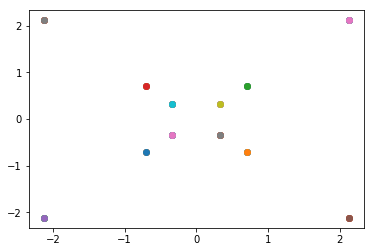

In [6]:
fig, ax = plt.subplots()
for k in narr:
    ax.plot(k[1],k[2],'o')
plt.show()

In [7]:
with open('blockMeshDict', 'a') as f:
    f.write('''vertices\n(\n''')
    for ii in narr:
        buf = '    ({0} {1} {2})\n'.format(ii[1],ii[2],ii[3])
        f.write(buf)
    f.write(');\n\n')

In [8]:
f = lambda x : x + 12
barr_t = [
    [0,1,2,3],
    [4,5,1,0],
    [1,5,6,2],
    [3,2,6,7],
    [4,0,3,7],
    [8,9,5,4],
    [5,9,10,6],
    [7,6,10,11],
    [8,4,7,11]
]

barr = []
for i in barr_t:
    barr.append(i+list(map(f,i)))
barr

[[0, 1, 2, 3, 12, 13, 14, 15],
 [4, 5, 1, 0, 16, 17, 13, 12],
 [1, 5, 6, 2, 13, 17, 18, 14],
 [3, 2, 6, 7, 15, 14, 18, 19],
 [4, 0, 3, 7, 16, 12, 15, 19],
 [8, 9, 5, 4, 20, 21, 17, 16],
 [5, 9, 10, 6, 17, 21, 22, 18],
 [7, 6, 10, 11, 19, 18, 22, 23],
 [8, 4, 7, 11, 20, 16, 19, 23]]

In [9]:
with open('blockMeshDict', 'a') as f:
    f.write('blocks\n(\n')
    for i in range(3):
        for j in barr:
            
            f.write('hex ({0} {1} {2} {3} {4} {5} {6} {7})\n'.format(j[0]+i*12,j[1]+i*12,j[2]+i*12,j[3]+i*12,j[4]+i*12,j[5]+i*12,j[6]+i*12,j[7]+i*12))
            f.write('(10 10 10)\n')
            f.write('simpleGrading (1 1 1)\n')
    f.write(');\n\n')

In [10]:
earr = [
    [4,5,0,-1*ri],
    [5,6,ri,0],
    [6,7,0,ri],
    [7,4,-1*ri,0],
    [8,9,0,-1*ro],
    [9,10,ro,0],
    [10,11,0,ro],
    [11,8,-1*ro,0]
]

In [11]:
with open('blockMeshDict', 'a') as f:
    f.write('''edges\n(\n''')
    for jj in range(4):
        for ii in earr:
            buf = '    arc {0} {1} ({2:f} {3:f} {4:f})\n'.format(ii[0]+jj*12,ii[1]+jj*12,ii[2],ii[3],L[jj])
            f.write(buf)
    f.write(');\n\n')

In [12]:
with open('blockMeshDict', 'a') as f:

    f.write('boundary\n(\n')
    f.write(');\n')